# Cross Validation
> Holdout sets are a great start to model validation. However, using a single train and test set if often not enough. Cross-validation is considered the gold standard when it comes to validating model performance and is almost always used when tuning model hyper-parameters. This chapter focuses on performing cross-validation to validate model performance. This is the Summary of lecture "Model Validation in Python", via datacamp.

- toc: true
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: images/loocv.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

### Two samples
After building several classification models based on the `tic_tac_toe` dataset, you realize that some models do not generalize as well as others. You have created training and testing splits just as you have been taught, so you are curious why your validation process is not working.

After trying a different training, test split, you noticed differing accuracies for your machine learning model. Before getting too frustrated with the varying results, you have decided to see what else could be going on.

In [5]:
tic_tac_toe = pd.read_csv('./tic-tac-toe.csv')
tic_tac_toe.head()

,MOVE1,MOVE2,MOVE3,MOVE4,MOVE5,MOVE6,MOVE7,CLASS
0,0,8,1,3,?,?,?,loss
1,4,7,2,6,?,?,?,win
2,0,8,1,6,5,?,?,draw
3,4,7,2,3,?,?,?,draw
4,0,4,2,1,?,?,?,win


In [8]:
# Create two different samples of 200 observations
sample1 = tic_tac_toe.sample(200, random_state=42)
sample2 = tic_tac_toe.sample(200, random_state=3)

# Print the number of common observations
print(len([index for index in sample1.index if index in sample2.index]))

# Print the number of observations in the Class column for both samples
print(sample1['Class'].value_counts())
print(sample2['Class'].value_counts())

17


KeyError: 'Class'

In [10]:
# Create two different samples of 200 observations
sample1 = tic_tac_toe.sample(200, random_state=42)
sample2 = tic_tac_toe.sample(200, random_state=3)

# Print the number of common observations
print(len([index for index in sample1.index if index in sample2.index]))

# Check for the actual column name and replace 'Class' if necessary
# Print the columns of the DataFrame to identify the correct column name
print(tic_tac_toe.columns)

# Assuming the correct column name is 'positive', replace 'Class' with 'positive'
print(sample1['CLASS'].value_counts())  # Replace 'positive' with the actual column name
print(sample2['CLASS'].value_counts())  # Replace 'positive' with the actual column name

17
Index(['MOVE1', 'MOVE2', 'MOVE3', 'MOVE4', 'MOVE5', 'MOVE6', 'MOVE7', 'CLASS'], dtype='object')
CLASS
draw    92
win     54
loss    54
Name: count, dtype: int64
CLASS
draw    102
win      55
loss     43
Name: count, dtype: int64


Notice that there are a varying number of positive observations for both sample test sets. Sometimes creating a single test holdout sample is not enough to achieve the high levels of model validation you want. You need to use something more robust.

## Cross-validation
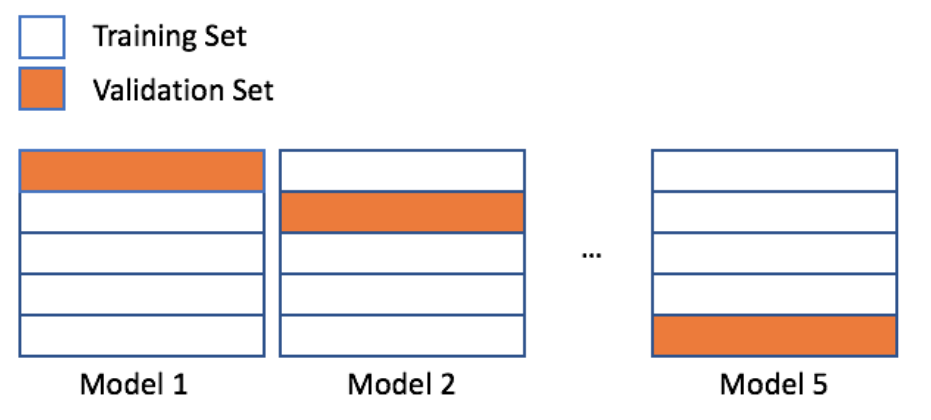

### scikit-learn's KFold()
You just finished running a colleagues code that creates a random forest model and calculates an out-of-sample accuracy. You noticed that your colleague's code did not have a random state, and the errors you found were completely different than the errors your colleague reported.

To get a better estimate for how accurate this random forest model will be on new data, you have decided to generate some indices to use for KFold cross-validation.

In [12]:
candy = pd.read_csv('./candy-data.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [16]:
X = candy.drop(['competitorname', 'winpercent'], axis=1).to_numpy()
y = candy['winpercent'].to_numpy()

In [17]:
from sklearn.model_selection import KFold

# Use Fold
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# Create splits
kf.get_n_splits(X)

# Print the number of indices
for train_index, test_index in kf.split(X):
    print("Number of training indices:", len(train_index))

    print("Number of test indices:", len(test_index))
print(kf)

Number of training indices: 70
Number of test indices: 15
Number of training indices: 71
Number of test indices: 14
Number of training indices: 71
Number of test indices: 14
Number of training indices: 71
Number of test indices: 14
Number of training indices: 71
Number of test indices: 14
Number of training indices: 71
Number of test indices: 14
KFold(n_splits=6, random_state=5, shuffle=True)


This dataset has 85 rows. You have created five splits - each containing about 71 training and 14 validation indices. You can use these indices to complete 6-fold cross-validation.

### Using KFold indices
You have already created `splits`, which contains indices for the candy-data dataset to complete 5-fold cross-validation. To get a better estimate for how well a colleague's random forest model will perform on a new data, you want to run this model on the five different training and validation indices you just created.

In this exercise, you will use these indices to check the accuracy of this model using the five different splits. A for loop has been provided to assist with this process.

In [18]:
# Create splits
splits = kf.split(X)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)

# Access the training and validation data
for train_index, test_index in splits:
    # Split the data, setup the training and validation data
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    # Fit the random forest model
    rfc.fit(X_train, y_train)

    # Make predictions, and print the accuracy
    predictions = rfc.predict(X_val)
    print("Split accuracy:" + str(mean_squared_error(y_val, predictions)))

Split accuracy:93.01900095757516
Split accuracy:58.13774997066364
Split accuracy:163.2138476431373
Split accuracy:167.90544822179373
Split accuracy:136.58422327626235


`KFold()` is a great method for accessing individual indices when completing cross-validation. One drawback is needing a for loop to work through the indices though.

## sklearn's cross_val_score()

### scikit-learn's methods
You have decided to build a regression model to predict the number of new employees your company will successfully hire next month. You open up a new Python script to get started, but you quickly realize that sklearn has a lot of different modules. Let's make sure you understand the names of the modules, the methods, and which module contains which method.

Follow the instructions below to load in all of the necessary methods for completing cross-validation using sklearn. You will use modules:

- metrics
- model_selection
- ensemble

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

### Implement cross_val_score()
Your company has created several new candies to sell, but they are not sure if they should release all five of them. To predict the popularity of these new candies, you have been asked to build a regression model using the candy dataset. Remember that the response value is a head-to-head win-percentage against other candies.

Before you begin trying different regression models, you have decided to run cross-validation on a simple random forest model to get a baseline error to compare with any future results.

In [22]:
rfc = RandomForestRegressor(n_estimators=25, random_state=1111)
mse = make_scorer(mean_squared_error)

# Setup cross_val_score
cv = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10, scoring=mse)

# Print the mean error
print(cv.mean())

154.2376943128833


You now have a baseline score to build on. If you decide to build additional models or try new techniques, you should try to get an error lower than 155.56. Lower errors indicate that your popularity predictions are improving.

## Leave-one-out-cross-validation (LOOCV)
- LOOCV
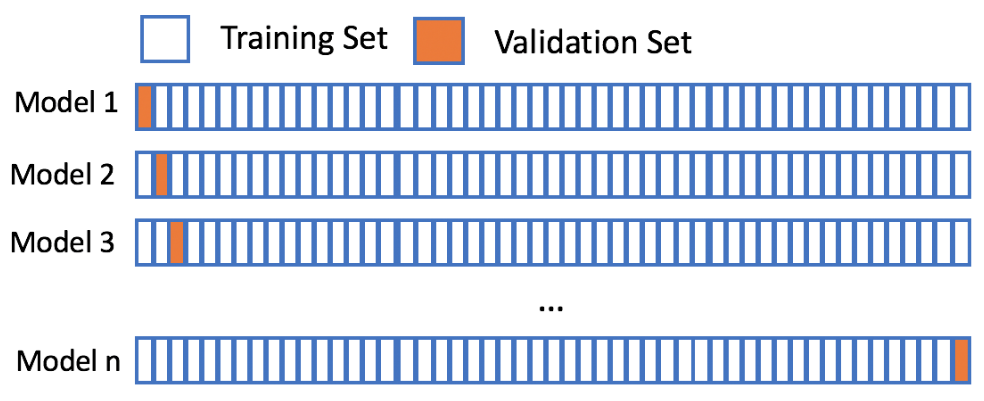
- When to use LOOCV?
    - The amount of training data is limited
    - You want the absolute best error estimate for new data
- Be cautious when:
    - Computation resources are limited
    - You have a lot of data
    - You have a lot of parameters to test

### Leave-one-out-cross-validation
Let's assume your favorite candy is not in the candy dataset, and that you are interested in the popularity of this candy. Using 5-fold cross-validation will train on only 80% of the data at a time. The candy dataset only has 85 rows though, and leaving out 20% of the data could hinder our model. However, using leave-one-out-cross-validation allows us to make the most out of our limited dataset and will give you the best estimate for your favorite candy's popularity!

In [23]:
from sklearn.metrics import mean_absolute_error

# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

rfr = RandomForestRegressor(n_estimators=14, random_state=1111)

# Implement LOOCV
scores = cross_val_score(rfr, X, y, cv=85, scoring=mae_scorer)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

The mean of the errors is: 9.605723760784315.
The standard deviation of the errors is: 7.312039042717496.
